<a href="https://colab.research.google.com/github/NihilisticMotif/EtCetera_at_an_Exhibition/blob/main/CV_Documentation_v01/MachineLearning/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Data

###[Step 1]: Import library and data set

In [ ]:
!pip install --upgrade -q gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
# import

from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import clear_output
from six.moves import urllib

from IPython.display import display, Latex

# Connect Google Collab with Google Sheet

from google.colab import auth
import gspread
from google.auth import default
from google.colab import data_table

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('student-mat').get_worksheet(0)
rows = worksheet.get_all_values()
dfmain = pd.DataFrame(rows)

# Display Data form Google Sheet

dfmain.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


###[Step 2]: clean data set

In [ ]:
# [1.] Get string from the first row of every columns
# reference: https://www.easytweaks.com/get-first-row-pandas-dataframe/
ColumnName = dfmain.iloc[0].to_list()

# [2.] Rename every column
for i in range(len(ColumnName)):
  dfmain.rename(columns={i:ColumnName[i]},inplace=True)

# [3.] Drop first row
dfmain=dfmain.drop([0], axis=0)

# [4.] Change Data Type
# reference: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
# reference: https://statisticsglobe.com/convert-string-boolean-pandas-dataframe-column-python
# reference: https://sparkbyexamples.com/pandas/pandas-convert-column-to-numpy-array/
# reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
# reference: https://stackoverflow.com/questions/2468334/creating-dynamic-and-expandable-dictionaries-in-python
# reference: https://favtutor.com/blogs/merge-dictionaries-python
# reference: https://datagy.io/python-int-to-binary/

# Change the data type of every column in dfmain
for i in range(len(ColumnName)):
  IsD=np.array(dfmain[ColumnName[i]])[0]
  if IsD.isdigit():
    # Change data type from String into Integer
    dfmain[ColumnName[i]]=dfmain[ColumnName[i]].apply(pd.to_numeric)
  else:
    continue
    dfmain[ColumnName[i]] = dfmain[ColumnName[i]].map(dict(Convert['data'][-1]))

In [ ]:
# [5.] Select only columns with numetric data type because in most case, linear regression is not work well with boolean data type
# and we want to demonstrate how linear regression with multiple features works.
# reference: https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe

ColumnType=dfmain.dtypes.astype('|S8') 
ColumnInt=[]
ColumnNot=[]

for i in range(len(ColumnName)):
  if str(ColumnType[i])=="b'int64'":
    ColumnInt.append(ColumnName[i])
  else:
    ColumnNot.append(ColumnName[i])

# [6.A] Select only 2 column, which are the single-feature input column and the out put column, in order to demonstrate
# 1 feature
ColAll=ColumnInt
ColX1f=[ColumnInt[-2]]
ColY1f=[ColumnInt[-1]]
df1f=dfmain.loc[:, dfmain.columns.intersection([ColX1f[0],ColY1f[0]])]

# [6.A] Select every only columns with numetric data.
# multiple features
dfmf=dfmain.drop(columns=ColumnNot)

ColXmf=[]

ColXmf=[]
for i in range(len(ColAll)):
  if ColAll[i] not in ColY1f:
    ColXmf.append(ColAll[i])

###[Step 3]: separate training data set from evaluating data set

In [ ]:
# Separate training and evaluating data in order to evaluate how well the algorithm predict data out side its data set.

def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(nameY, axis=1)
  TrainY=TrainD[nameY]
  TesttX=TesttD.drop(nameY, axis=1)
  TesttY=TesttD[nameY]

  #print('TrainX')
  #print(TrainX)
  #print('TesttX')
  #print(TesttX)

  return [TrainX,TrainY,TesttX,TesttY]

# df = data frame
# Col = Column
# X = input
# Y = Output
# Te = evaluating data
# Tr = training data
# 1f = for single feature linear regression
# mf = for multiple features linear regression

'''
DaD1f=SeparateData(df1f,0.75,ColY1f)
TrX1f=DaD1f[0]
TrY1f=DaD1f[1]
TeX1f=DaD1f[2]
TeY1f=DaD1f[3]
'''

'''
TrX=TrX1f
TrY=TrY1f
TeX=TeX1f
TeX=TeY1f
'''

DaDmf=SeparateData(dfmf,0.75,ColY1f)
TrX=DaDmf[0]
TrY=DaDmf[1]
TeX=DaDmf[2]
TeY=DaDmf[3]

#(1.) Linear Regression

###Introduction

**What is Linear Regression**

In statistics, linear regression is a linear approach for modelling the relationship between multiple variables. This tutorial demonstrate the simplest linear regression model.

Here is the source of this dataset: https://youtu.be/BOhgGA7Eu5E

**What I will do in this tutorial?**
* I will demonstrate how to implement Linear Regression.

1. Implementing Linear Regression
  1. Initializing Variable (Hypothesis function)
  2. Creating Evaluating Function (Loss Function, Square Error function)
  3. Creating Optimizing Evaluating Function (Gradient Descent function)
  4. Implement Linear Regression using SK learn library.
  4. Evaluate the accuracy of both models (R square)
4. Plotting Graph of both models.
 1. Ploting the accual and predicted value
 2. Ploting bias (x), weight (y) and the Loss function (z)
 3. Ploting the epochs and Loss function (y) 

###(1.) Creating Hypothesis Function and define variables

Linear regression is a machine learning model which is used for predicting the relationship between matrix $X$ and vector $\vec{y}$, based on the given data on the graph.In this case, the linear regression is displayed as

* $\vec{y}'=h(X)=X\cdot\vec{w}+\vec{b}$
 * $m=$ number of all rows
 * $n=$ number of all features
 * $X\in\mathbb{R^{m\times n}}=$ input matrix
 * $\vec{y}'\in\mathbb{R^{n}}=$ output
 * $\vec{w}\in\mathbb{R^{n}}=$ weight
 * $\vec{b}\in\mathbb{R^{m}}=$ bias

###(2.) Creating Evaluating Function (a.k.a. Loss Function or Squared error function)

**Accuracy of hypothesis function**

The Loss function is a method of evaluating how well the hypothesis function is modeling the dataset. The lower the loss function, the better the model. (https://www.analyticsvidhya.com/blog/2022/06/understanding-loss-function-in-deep-learning/)

$J(\vec{w},b)=\frac{1}{2m}\sum_{i=1}^m(y'_i-y_i)^2$

* error = $y'_i - y_i$
* $m$ = number of all training example.

Q: Why $\frac{1}{2m}$ ?

Q: Why do we have to divide by 2 in the ML squared error cost function?

A: It is because when you take the derivative of the cost function, that is used in updating the parameters during gradient descent, that 2 in the power get canceled with the 1/2 multiplier, thus the derivation is cleaner. (https://datascience.stackexchange.com/questions/52157/why-do-we-have-to-divide-by-2-in-the-ml-squared-error-cost-function)


Q: Why $(...)^2$  ? 

Q: Why is a square mean error used instead of taking its absolute value? Both are removed negatives, but why is the mean squared error so widely used?

A: By squaring the errors we are ignoring the effect of sign $(+ -)$.
The contribution of larger errors to the sum of errors becomes more compared to small errors.
(https://www.quora.com/Why-is-a-square-mean-error-used-instead-of-taking-its-absolute-value-Both-are-removed-negatives-but-why-is-the-mean-squared-error-so-widely-used)


###(3.) Create Optimization Function using Gradient Descent

**Gradient descent of logistic repression**

Gradient descent is an optimization algorithm which is used for minimizing error value of the error function

$\vec{w}:=\vec{w}-a*\frac{\partial}{\partial \vec{w}}J_n(\vec{w})$
* $\frac{\partial}{\partial \vec{w}}J_n(\vec{w})=\frac{1}{m}[(X\cdot\vec{w}+\vec{b}-\vec{y})\cdot X]$

$b:=b-a*\frac{\partial}{\partial b}J_n(b)$
* $\frac{\partial}{\partial b}J_n(b)=\frac{1}{m}[(X\cdot\vec{w}+\vec{b}-\vec{y})\cdot\vec{1}]$

Reference: 
* https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

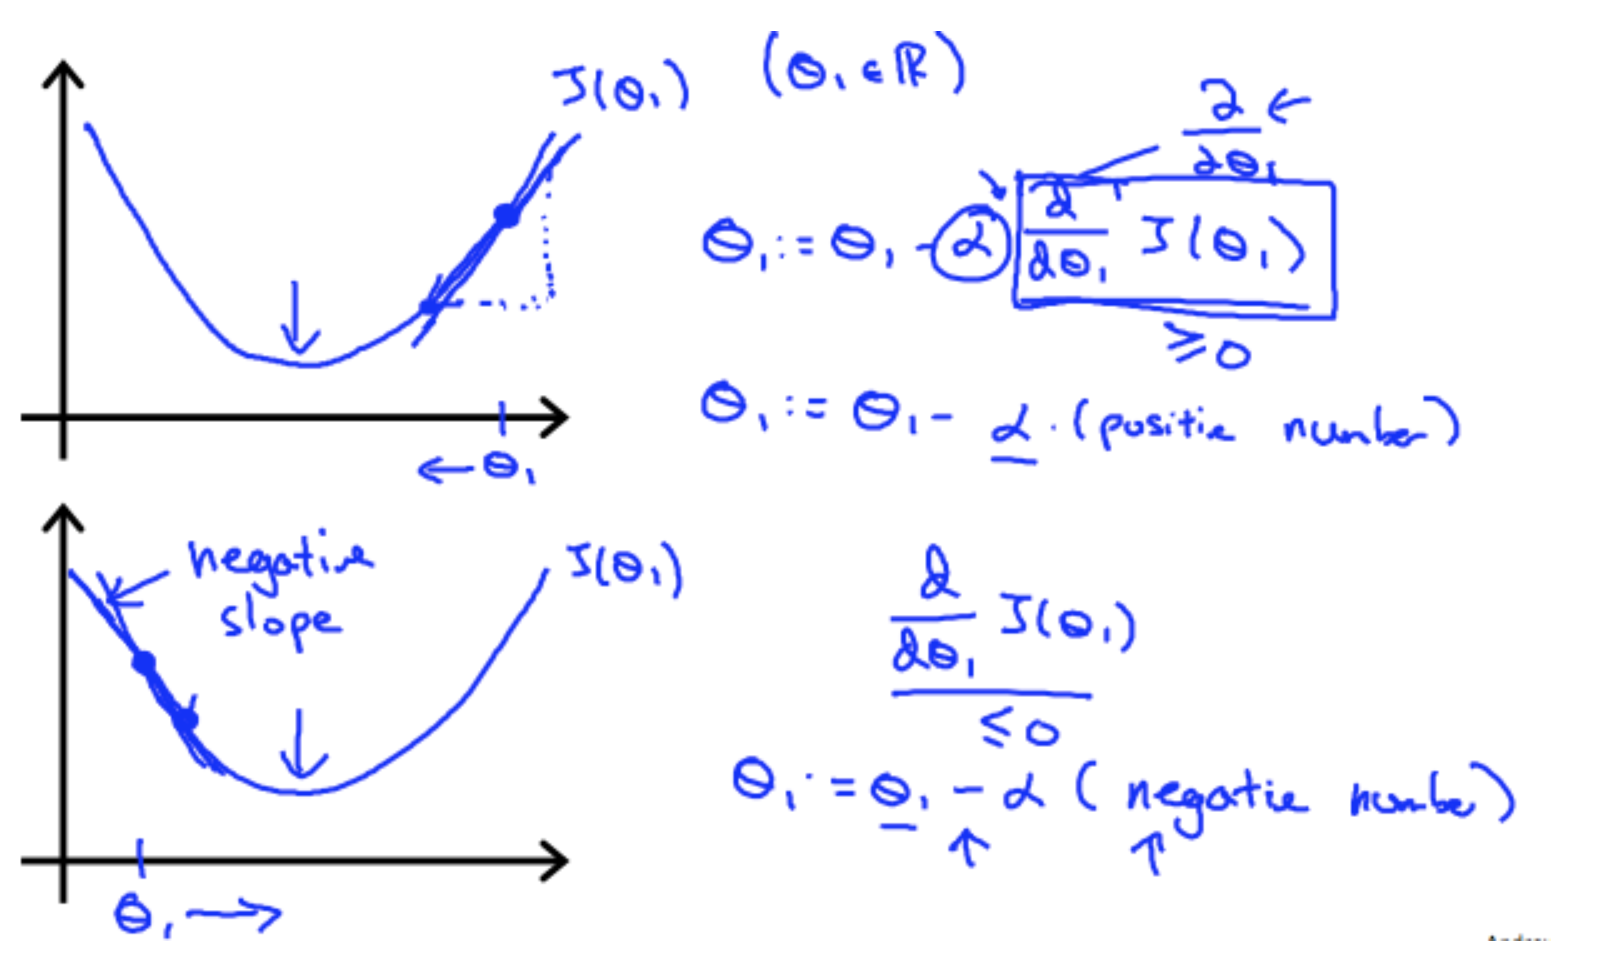

**This picture is provided by Andrew Ng.**

Q: Why $-a*J'(w_{i})$?

A: 

When value of $w_{i} < $ minimum point $J'(w_{i})<0 \implies -a*J'(w_{i})>0$

$\therefore w_{i}:=w_{i}-a*J'(w_{i})$ increase the value of $w_{i}$ to equal to minimum error point.

When value of $w_{i} > $ minimum point $J'(w_{i})>0 \implies -a*J'(w_{i})<0$

$\therefore w_{i}:=h_{i}-a*J'(w_{i})$ decrease the value of $w_i$ to equal to minimum error point. (This concept can also be applied with $b$.)

**Keyword**
* Epoch = a single full iteration of the algorithm over the training data. (https://medium.com/@niitwork0921/what-is-epoch-in-machine-learning-1062064d42d6)

**My linear regression implementation**

In [ ]:
def LineR_DiffEvaluation(dX,dY,Coef,Inte):
  DeltaH=(
    np.dot(
        dX,
        Coef)
    +np.full(
        (dX.shape[0]),
        Inte)
    -dY.values.reshape(-1) # https://stackoverflow.com/questions/42240376/dataframe-object-has-no-attribute-reshape
  )
  CoefList=[]
  for i in dX.columns:
    CoefList.append((DeltaH*dX[i]).mean())
  return [DeltaH.mean(),CoefList]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent(dX,dY,Diff,LRate=0.002,Decay=0.000_005,LastEpoch=10_000, AcceptError=1e-10):
  epoch=0
  Coef_Vect=np.ones(len(dX.columns))
  Inte_Cons=1
  GD_Growth=[]
  while epoch<LastEpoch or (np.all(np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])<=AcceptError)and (np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])<=AcceptError)):
    #print(Diff(dX,dY,Coef_Vect,Inte_Cons))
    #print(np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1].tolist()).reshape((-1)))
    Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1]).reshape((-1))
    Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[0].tolist()).reshape((-1))

    row = pd.DataFrame({
              'epoch No.': [epoch], 
              'Error': [np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])],
              })
    GD_Growth.append(row)
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  GD_Growth = pd.concat(GD_Growth)
  # reference: https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
  return [list(Inte_Cons),list(Coef_Vect),GD_Growth]
  # 2 minutes 44 seconds

P_Line=GradientDescent(TrX,TrY,LineR_DiffEvaluation)
print('Complete')
print(P_Line)

Complete
[[0.9625340427329042], [-0.25132417996476714, 0.1091478053364058, -0.18471415278361406, -0.0344698081866312, -0.12895838190383774, -0.16131700034664168, 0.3755194689672319, 0.12616443348289516, -0.13013571772105598, -0.06410716578616726, 0.16320348674853116, -0.01258521824471033, 0.040889072760578335, 0.20023737311046422, 0.9342587995325426],     epoch No.      Error
0           0  16.136805
0           1   4.647694
0           2   0.904629
0           3   0.597410
0           4   0.205176
..        ...        ...
0        9995   0.001429
0        9996   0.001429
0        9997   0.001429
0        9998   0.001429
0        9999   0.001429

[10000 rows x 2 columns]]


###(4.) SKLearn implementation

In [ ]:
print(TrX.shape)
print(TrY.shape)

(296, 15)
(296, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
SK_Line = LinearRegression()
SK_Line.fit(TrX,TrY)
print(SK_Line.coef_)
print(SK_Line.intercept_)

[[-0.23405324  0.11303346 -0.18087382 -0.02773698 -0.12402451 -0.16397872
   0.38035662  0.13025736 -0.13044481 -0.06701678  0.16553147 -0.00838295
   0.04060142  0.19895263  0.93689099]]
[0.57353443]


###(5.) Evaluate the accuracy of the linear regression implementation (R square)

**What is $R^2$?**

$R^2$ indicates how well the data fit the regression model (the goodness of fit). ($R^2$ have the similar purpose to Square Error Function, $J(h)$)

**Note that**
* Large $R^2$ does not guarantee good prediction. It is simply a measure of how well the model explains the variability in the observed data

**This is Square Error Function**
* $J(\vec{w},b)$ =$\frac{1}{2m}\sum_{i=1}^m(y'_i-y_i)^2$

**This is $R^2$**
* $R^2(\vec{y},\vec{y}')=1-\frac{\Sigma_{i=1}^n(y_i-y'_i)^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\in[0,1]$
* $y_m=\frac{1}{m}*\sum_{i=1}^my_i$

**Why $R^2(\vec{y},\vec{y}')=1-\frac{\Sigma_{i=1}^n(y_i-y'_i)^2}{\Sigma_{i=1}^n(y_i-y_m)^2}\in[0,1]$?**

**Why $\Sigma_{i=1}^n(y_i-y'_i)^2$?**
* $\Sigma_{i=1}^n(y_i-y'_i)^2=2m*J(\vec{w},b)=\sum_{i=1}^m(y'_i-y_i)^2$
* $\frac{1}{2m}$ is not useful because $R^2$ have nothing to do with derivative and gradient descent. Moreover $\frac{1}{2m}$ not suit with $R^2\in[0,1]$

**Why $\Sigma_{i=1}^n(y_i-y_m)^2$?**
* $\Sigma_{i=1}^n(y_i-y_m)^2 indicates different between accual y-axis value and its average value.

**Why $1-r^2$?**

* Convert minimized error value into accuracy percentage

reference:
* https://stats.stackexchange.com/questions/469654/why-must-the-r-squared-value-of-a-regression-be-less-than-1
* https://towardsdatascience.com/an-ode-to-r-squared-804d8d0ed22c
* https://youtu.be/bMccdk8EdGo

**MSE $J(\vec{w},b)$ or R-Squared $(R^2)$ – Which one to Use?**

* It is recommended to use R-Squared because disadvantage of using MSE than R-squared is that it will be difficult to gauge the performance of the model using MSE as the value of MSE can vary from 0 to any larger number. On the other hand, in the case of R-squared, the value is bounded between 0 and 1. A value of R-squared closer to 1 would mean that the regression model covers most part of the variance of the values of the response variable and can be termed as a good model. 

* reference: https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

**My R square Implementation**

In [ ]:
def FindR2(TestX,TestY,Coef_Vect,Inte_Cons):
  m=TestX.shape[0]
  TestY=TestY.values.reshape(-1)
  dH=np.dot(TestX,np.array(list(Coef_Vect)))+np.full((m),Inte_Cons)-TestY
  dY=(1/m)*np.dot(TestY,np.full((m),1))*np.full((m),1)-TestY
  #dY=TestY.mean()-TestY
  
  #print('Hello')
  #print(np.dot(dH,dH))
  #print(np.dot(dY,dY))
  
  return np.dot(dH,dH)/np.dot(dY,dY)

R2_0=FindR2(TeX,TeY,P_Line[1],P_Line[0])
R2_1=FindR2(TeX,TeY,SK_Line.coef_.tolist()[0],SK_Line.intercept_)

print("R2_0 = "+str(1-R2_0))
print("R2_1 = "+str(1-R2_1))

R2_0 = 0.8455560478749424
R2_1 = 0.8462377083058896


**SK Learn R square Implementation**

In [ ]:
from sklearn.metrics import r2_score

mm=TeX.shape[0]

R2_0=r2_score(TeY,np.dot(TeX,P_Line[1])+np.full((mm),P_Line[0]))
R2_1=r2_score(TeY,np.dot(TeX,SK_Line.coef_.tolist()[0])+np.full((mm),SK_Line.intercept_))
#print('R222='+str(skRLmf.coef_.tolist()[0])+np.full((mm),skRLmf.intercept_))
print('R2_0 = '+str(R2_0))
print('R2_1 = '+str(R2_1))
#print("R^2 = "+str(R2_0))
#print("R^2 = "+str(R2_1))

R2_0 = 0.8455560478749424
R2_1 = 0.8462377083058896


#(2.) Plotting Graph of Linear Regression Model

###(1.) Ploting the accual and predicted value

In [ ]:
ColXi=-1
ColX=ColXmf[ColXi]
ColY=ColY1f[0]

print(ColX)
print(ColY)

G2
G3


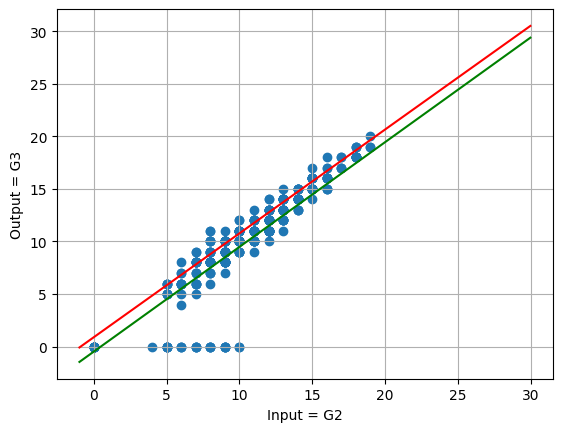

In [ ]:
# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel('Input = '+ColX)
plt.ylabel('Output = '+ColY)

# Data is plotted.
plt.scatter(dfmf[ColX],dfmf[ColY])

# Here is the hypothesis function a.k.a. prediction function.
xpoints = np.arange(-1,30,0.01)
plt.plot(xpoints, xpoints*P_Line[1][ColXi]+P_Line[0],color='red')                   # My Implementation
plt.plot(xpoints, xpoints*SK_Line.coef_[0][ColXi]+SK_Line.intercept_,color='green') # SK Learn Implementation

plt.show()

**About this graph**

This graph indicates how 2 linear regression models predict the relationship between input and output data, compare to the accual data.

###(2.) Ploting bias (x), weight (y) and the Loss function (z)

Text(0.5, 0, 'SquareError')

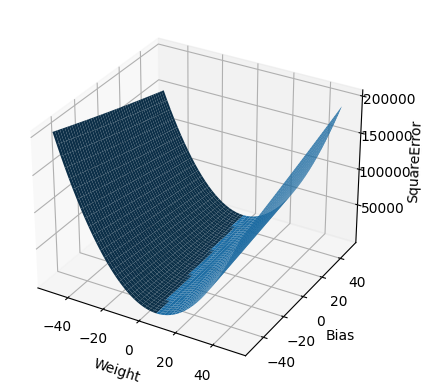

In [ ]:
# import graph library
#import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

def LineR_Evaluation_1f(data,m,c):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    sigma =0
    for i in range(data.shape[0]):
      sigma +=pow((data.iat[i,0]*m+c-data.iat[i,1]),2)
    return (1/(2*data.shape[0]))*sigma

N = 50
M = 50

Cost = {
  "X": np.array(list(TrX['G1'])),
  "Y": TrY.to_numpy().reshape(-1)
}

Costs = pd.DataFrame(Cost)
# reference: https://www.w3schools.com/python/pandas/pandas_dataframes.asp

x_values = np.linspace(-50, 50, N)
y_values = np.linspace(-50, 50, M)
X, Y = np.meshgrid(x_values, y_values)
Z = LineR_Evaluation_1f(Costs,X, Y)

# Plotting 3D Data.
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z);

ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('SquareError')
#ax.view_init(0, 90);
# reference: https://youtu.be/gqoLLGgbeAE

# other related information: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

**About this graph**

The lower the areas, means the lower the value of square error (the better the model is).

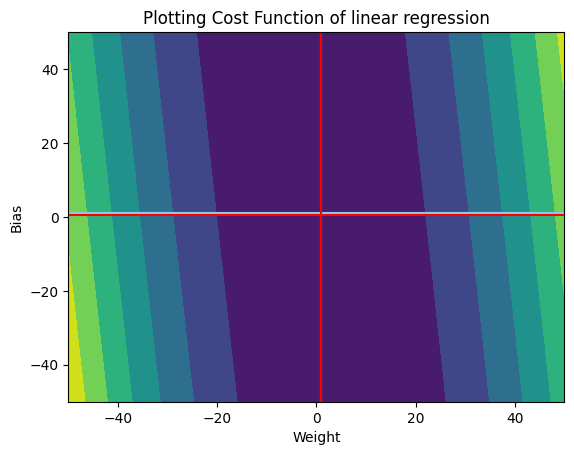

In [ ]:
fig, ax = plt.subplots(1, 1)
  
ax.contourf(X, Y, Z)
ax.axvline(P_Line[1][-1],color='skyblue')
ax.axhline(P_Line[0][0],color='skyblue')
ax.axvline(SK_Line.coef_[0][-1],color='red')
ax.axhline(SK_Line.intercept_[0],color='red')
ax.set_title('Plotting Cost Function of linear regression')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
  
plt.show()
# reference: https://www.geeksforgeeks.org/contour-plot-using-matplotlib-python/

**About this graph**

The darker the areas of the graph , means the lower the value of loss function (the better the model is). It is noteworthly that the weight and bias usually approach the darker area.

###(3.) Ploting the epochs and Loss function (y) 

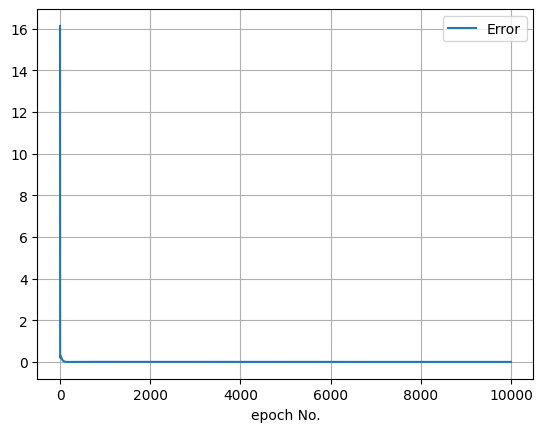

In [ ]:
P_Line[2].plot(x='epoch No.',y='Error')
plt.grid()
plt.show()